<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preamble" data-toc-modified-id="Preamble-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preamble</a></span></li><li><span><a href="#Compositing" data-toc-modified-id="Compositing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Compositing</a></span><ul class="toc-item"><li><span><a href="#Positve-or-Negative" data-toc-modified-id="Positve-or-Negative-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Positve or Negative</a></span></li><li><span><a href="#Merging" data-toc-modified-id="Merging-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Merging</a></span></li></ul></li><li><span><a href="#Extreme-Indices" data-toc-modified-id="Extreme-Indices-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Extreme Indices</a></span></li><li><span><a href="#Pickle" data-toc-modified-id="Pickle-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Pickle</a></span></li><li><span><a href="#Defunct" data-toc-modified-id="Defunct-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Defunct</a></span></li></ul></div>

# Preamble

In [372]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import pickle


import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

In [373]:
path = '/home/student.unimelb.edu.au/aborowiak/Desktop/Code/Current Project/Stations/MJO/MJO_ex_days.pickle'
pickle_in = open(path, 'rb')
MJO_ex_days = pickle.load(pickle_in)

In [374]:
path_2 = '/home/student.unimelb.edu.au/aborowiak/Desktop/Code/Current Project/Stations/MJO/MJO_df.pickle'
pickle_in_2 = open(path_2, 'rb')
MJO_df = pickle.load(pickle_in_2)

In [375]:
MJO_ex_days['P90']['2009'].head()

,Rainfall (mm),Phase,Amplitude
Date,,,
1974-11-26,49.4,5.0,1.05443
1974-12-21,31.0,8.0,1.35984
1975-02-01,36.0,1.0,2.02628
1975-12-09,39.0,4.0,1.50607
1976-02-10,52.4,8.0,1.72448


In [376]:
path = '/home/student.unimelb.edu.au/aborowiak/Desktop/Code/Current Project/Stations/ENSO/NINO34_Index.pickle'
pickle_in = open(path, 'rb')
NINO34 = pickle.load(pickle_in)

In [377]:
path = '/home/student.unimelb.edu.au/aborowiak/Desktop/Code/Current Project/Stations/ENSO/NINO34_wet_s.pickle'
pickle_in = open(path, 'rb')
NINO34_wet_s = pickle.load(pickle_in)

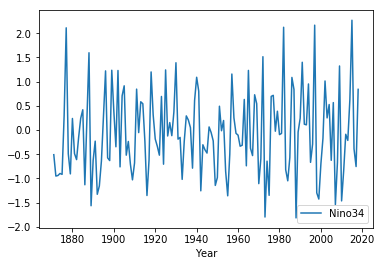

In [378]:
NINO34_wet_s.plot()

#  Compositing 

## Positve or Negative

Making serperate lists of the Positive and negative Nino34 will help 

In [379]:
La_Nina = NINO34_wet_s[NINO34_wet_s['Nino34'] < 0] #La Nino occurs when Nino3.4 is less than zero

El_Nino = NINO34_wet_s[NINO34_wet_s['Nino34'] > 0] #El Nino occurs when Nino3.4 is greater than zero

## Merging 

In [380]:
import warnings
warnings.filterwarnings("ignore")

In [381]:
'''Set UP'''

#Dates (years) that are eather EL Nino or Lina, magnitude is not important here, only direction.
La_Nina_dates = La_Nina.index
El_Nino_dates = El_Nino.index



'''Code'''
#This will be a dict of dict's

ENSO_MJO_dict = {}

#The different extreme indices are the keys to the 
exind_list = list(MJO_ex_days.keys())


#Looping through all of the different types of extreme indices
for ex in exind_list:
    
    #A dict to store all of the results in. This dict will then be stored in the ENSO_MJO_dict
    ex_dict = {}
    
    current_stations = list(MJO_ex_days[ex].keys())
    
    for station in current_stations:
    
    
        data = MJO_ex_days[ex][station]
        data = data[data['Amplitude'] < 8000]
    

        '''La Nina'''

        La_Exind = data[data.index.year.isin(La_Nina_dates)]
        La_Exind['Nino Value'] = np.tile([-1], len(La_Exind ))

        '''El NIno'''


        El_Exind = data[data.index.year.isin(El_Nino_dates)]
        El_Exind['Nino Value'] = np.tile([1], len(El_Exind ))


        '''Merging'''

        merger  = La_Exind.append(El_Exind)


        '''Sorting'''
        merger = merger.sort_index()
        
        
        '''Dictionary for each station '''
        ex_dict[station] = merger
    
    
    
    '''Dictionary For each Exind'''
    ENSO_MJO_dict[ex] = ex_dict

In [382]:
ENSO_MJO_dict['RX1d']['2009'].head()

,Rainfall (mm),Phase,Amplitude,Nino Value
Date,,,,
1974-10-15,17.2,4.0,1.06163,-1
1974-11-26,49.4,5.0,1.05443,-1
1975-01-09,17.2,4.0,1.41147,-1
1975-02-01,36.0,1.0,2.02628,-1
1975-03-10,30.0,3.0,1.21821,-1


# Extreme Indices

In [383]:
'''Dictinary: This dictionary will store dictionaries, that store dfs'''
MJO_ENSO_exinds  = {}


'''List of all of the extreme indices'''
exinds = list(ENSO_MJO_dict.keys())


'''Stations to be used'''
current_stations = list(MJO_df.index)

'''Extreme Indice Loop'''
for ex in exinds:
    
    
    #Dataframes to store all of the results in
    EL_freq_df = pd.DataFrame()
    LA_freq_df = pd.DataFrame()

    EL_int_df = pd.DataFrame()
    LA_int_df = pd.DataFrame()

    '''Station Loop'''
    for station in current_stations:
        data = ENSO_MJO_dict[ex][station]
        data = data.replace(np.nan, 0)

        '''The data has been grouped by the phase of the MJO as well as wether it occured during El Nino (1)
        or La Nina (-1)'''


        ''' For Loops '''
        #############
        EL_int = []
        LA_int = []
    
        EL_freq = []
        LA_freq = []
        
        
        MJO_phases = np.arange(1,9)
        for phase in MJO_phases:
            single_phase = data[data['Phase'] == phase]
            
            
            '''El Nino'''
            
            #EL Nin0 is when 'Nino Value' == 1
            EL_single = single_phase[single_phase['Nino Value'] == 1 ]
            
            
            #If there are no values in the phase
            if len(EL_single) == 0:
                EL_single_int = 0
                EL_single_freq = 0
                
            #Else if there are values caululate the AVerage Intensity (mean) and the Frequency (len)
            else:
                EL_single_int = EL_single['Rainfall (mm)'].mean()
                EL_single_freq = len(EL_single['Rainfall (mm)'])
            
            EL_int.append(EL_single_int)
            EL_freq.append(EL_single_freq)         
            
            
            
            
            '''La Nina'''
            
            #La Nina is when 'Nino Value' == -1
            LA_single = single_phase[single_phase['Nino Value'] == -1 ]
            
            
            #If there are no values in the phase
            
            if len(LA_single) == 0:
                LA_single_int = 0
                LA_single_freq = 0
                
            #Else if there are values caululate the AVerage Intensity (mean) and the Frequency (len)
            else:
                LA_single_int = LA_single['Rainfall (mm)'].mean()
                LA_single_freq = len(LA_single['Rainfall (mm)'])
                                                       

            LA_int.append(LA_single_int)
            LA_freq.append(LA_single_freq)
        
            

        ######### 
        '''Reading all of the lists into dataframes'''
        
        
        EL_int_df[station] = EL_int
        LA_int_df[station] = LA_int
                                     
        EL_freq_df[station] = EL_freq
        LA_freq_df[station] = LA_freq
        
        
    '''Adding Phase Index'''
    MJO_phases = np.arange(1,9)
    
    LA_freq_df['Phase'] = MJO_phases
    LA_freq_df = LA_freq_df.set_index('Phase')
    
    LA_int_df['Phase'] = MJO_phases
    LA_int_df = LA_int_df.set_index('Phase')
    
    EL_freq_df['Phase'] = MJO_phases
    EL_freq_df = EL_freq_df.set_index('Phase')
    
        
    EL_int_df['Phase'] = MJO_phases
    EL_int_df = EL_int_df.set_index('Phase')
    
    '''Concatinating the DF's: Multindex sup is El Nino and La Nina'''

    #Frequency
    

    
    
    
    Freq_df  = pd.concat({'La Nina': LA_freq_df, 'El Nino': EL_freq_df}, axis = 1)
    Freq_df = Freq_df.replace(np.nan,0)

    
    Int_df  = pd.concat({'La Nina': LA_int_df, 'El Nino': EL_int_df}, axis = 1)
    Int_df = Int_df.replace(np.nan,0)
    
                             
    '''Adding all the data frames to a dictionary'''
    Exind_dict = {'Frequency': Freq_df, 'Intensity (mm)' : Int_df}
                             
    MJO_ENSO_exinds[ex] = Exind_dict                         
                             

In [384]:
MJO_ENSO_exinds['P90']['Frequency']

El Nino                                               ...  La Nina  \
         5004 5008 5014 4006 3028 3030 3024 3017 3027 2009  ...    29048   
Phase                                                       ...            
1           0    0    0    2    0    2    2    6    3    3  ...        8   
2           0    0    3    1    0    0    1    4    5    3  ...        3   
3           0    0    3    2    0    1    4    9    2    7  ...        8   
4           1    5    6    5    1    5    4   11    9    3  ...        5   
5           0    6    4    3    5    4    7   11   12    7  ...        4   
6           4    2    5    7    5    4    9   13   11   12  ...       12   
7           1    2    2    4    4    6    4    6    7    3  ...       11   
8           0    0    2    3    7    6    4    5    4    6  ...       11   

                                                             
      37001 37049 36028 28004 31055 31011 32040 33073 39049  
Phase                                                        
1         2     1     2     6     8     9     7     4     5  
2         2     4     2     8     9    10     3     0     1  
3         9     4     6     7     8    11     5     1     5  
4         2     3     6    12     5     7     3     1     5  
5         3     4     1     8    11     9     6     6     5  
6         7     6     0    12    30    18     6     5     9  
7         6    11    10    15    24    13    16    12     6  
8         5     7     2     6    16    11     9     6     3  

[8 rows x 64 columns]

# Pickle

In [385]:
out_file = open('MJO_ENSO_exinds_2.pickle','wb')
pickle.dump(MJO_ENSO_exinds, out_file)
out_file.close()

# Defunct

In [ ]:
'''This code was made for the extreme indices, it did not calculate everything correceltly.
Giving less values for each phase than actually occured'''

''' Group By'''
        
#         '''Frequency '''


#         #Size return the number of events that occured during each phase of the MJO and phase of ENSO
#         ENSO_Phase_freq = data.groupby(['Phase', "Nino Value"])['Rainfall (mm)'].size()


#         #The value in the second position is wehter we are extreacting the El Nino or La Nina events
#         EL_freq = ENSO_Phase_freq.loc[:, 1]
#         LA_freq = ENSO_Phase_freq.loc[:, -1]

#         #Adding the Data into Dataframes
#         EL_freq_df[station] = EL_freq
#         LA_freq_df[station] = LA_freq


#         '''AVerage Intensity'''
        
        
        ##############
        #Mean returns the average inentisty of the RX1d events that occured during each phase of the MJO and
        #phase of ENSO
#         ENSO_Phase_int = data.groupby(['Phase', "Nino Value"])['Rainfall (mm)'].mean()


            

        #The value in the second position is wehter we are extreacting the El Nino or La Nina events
#         EL_int = ENSO_Phase_int.loc[:, 1]
#         LA_int = ENSO_Phase_int.loc[:, -1]
        #         #Adding the Data into Dataframes
#         EL_int_df[station] = EL_int


#         LA_int_df[station] = LA_int